# Balgyn's model

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_dataset1='/content/drive/MyDrive/Colab Notebooks/speech/audio_speech_actors_01-24'              # ravdess
path_to_dataset2='/content/drive/MyDrive/Colab Notebooks/speech/AudioData/AudioData'                    # savee
path_to_dataset3='/content/drive/MyDrive/Colab Notebooks/speech/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data' # Tess

In [ ]:
os.listdir(path_to_dataset1)

['Actor_06',
 'Actor_08',
 'Actor_03',
 'Actor_01',
 'Actor_07',
 'Actor_10',
 'Actor_04',
 'Actor_02',
 'Actor_05',
 'Actor_09',
 'Actor_20',
 'Actor_13',
 'Actor_12',
 'Actor_19',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_14',
 'Actor_11',
 'Actor_15',
 'Actor_22',
 'Actor_23',
 'Actor_21',
 'Actor_24']

In [ ]:
os.listdir(path_to_dataset2)

['Info.txt', 'JE', 'DC', 'JK', 'KL']

In [ ]:
 os.listdir(path_to_dataset3)

['OAF_neutral',
 'OAF_disgust',
 'OAF_happy',
 'OAF_angry',
 'OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_fear',
 'YAF_disgust',
 'YAF_angry',
 'YAF_happy',
 'YAF_sad',
 'YAF_pleasant_surprised',
 'YAF_neutral']

In [ ]:
import os
import pandas as pd
import random
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [ ]:
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk(path_to_dataset1):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3)) 
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')       

df_ravdess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'RAVDESS', 'emotion':labels})

df_ravdess.sample(5)

,path,duration,dataset,emotion
535,/content/drive/MyDrive/Colab Notebooks/speech/...,3.237,RAVDESS,fear
688,/content/drive/MyDrive/Colab Notebooks/speech/...,3.403,RAVDESS,surprise
678,/content/drive/MyDrive/Colab Notebooks/speech/...,3.270,RAVDESS,disgust
929,/content/drive/MyDrive/Colab Notebooks/speech/...,3.537,RAVDESS,calm
828,/content/drive/MyDrive/Colab Notebooks/speech/...,3.403,RAVDESS,sad


In [ ]:
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk(path_to_dataset3):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))
        
        label = filename[::-1].split('_')[0][::-1]
        labels.append(label[:-4].lower())

df_tess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'TESS', 'emotion':labels})

df_tess['emotion'] = df_tess['emotion'].replace(['ps'], 'surprise')
                  
df_tess.sample(5)

,path,duration,dataset,emotion
2024,/content/drive/MyDrive/Colab Notebooks/speech/...,1.761,TESS,happy
2440,/content/drive/MyDrive/Colab Notebooks/speech/...,1.701,TESS,surprise
2603,/content/drive/MyDrive/Colab Notebooks/speech/...,2.269,TESS,neutral
1202,/content/drive/MyDrive/Colab Notebooks/speech/...,2.545,TESS,sad
2679,/content/drive/MyDrive/Colab Notebooks/speech/...,2.200,TESS,neutral


In [ ]:
paths, labels, duration = [], [], []
import librosa
for dirname, _, filenames in os.walk(path_to_dataset2):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[:1] == 'a':
            labels.append('angry')
        elif label[:1] == 'd':
            labels.append('disgust')
        elif label[:1] == 'f':
            labels.append('fear')
        elif label[:1] == 'h':
            labels.append('happy')
        elif label[:1] == 'n':
            labels.append('neutral')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad')
            else:
                labels.append('surprise')

paths = paths[1:] # to filter out 'info.txt' file
for file in paths:
    duration.append(round(librosa.get_duration(filename=file), 3)) 

df_savee = pd.DataFrame({'path':paths, 'duration': duration, 'dataset': 'SAVEE', 'emotion':labels})
                  
df_savee.sample(5)


,path,duration,dataset,emotion
66,/content/drive/MyDrive/Colab Notebooks/speech/...,4.048,SAVEE,happy
403,/content/drive/MyDrive/Colab Notebooks/speech/...,3.276,SAVEE,fear
232,/content/drive/MyDrive/Colab Notebooks/speech/...,5.031,SAVEE,surprise
375,/content/drive/MyDrive/Colab Notebooks/speech/...,3.317,SAVEE,angry
473,/content/drive/MyDrive/Colab Notebooks/speech/...,2.432,SAVEE,neutral


In [ ]:
# Let's merge the datesets together, now that they have been formatted the same way:

df = pd.concat([df_tess, df_ravdess, df_savee])

# Dropping 'calm' as out the scope (also not many samples)
df = df[df['emotion'].str.contains('calm') == False].reset_index(drop=True)

print('The dataset has {} audio files. Below printed 5 random entries:'.format(df.shape[0]))

df.sample(5)

The dataset has 4534 audio files. Below printed 5 random entries:


,path,duration,dataset,emotion
2913,/content/drive/MyDrive/Colab Notebooks/speech/...,3.604,RAVDESS,happy
3728,/content/drive/MyDrive/Colab Notebooks/speech/...,3.737,RAVDESS,happy
2510,/content/drive/MyDrive/Colab Notebooks/speech/...,1.954,TESS,surprise
1375,/content/drive/MyDrive/Colab Notebooks/speech/...,2.475,TESS,sad
2751,/content/drive/MyDrive/Colab Notebooks/speech/...,2.102,TESS,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   path      4534 non-null   object 
 1   duration  4534 non-null   float64
 2   dataset   4534 non-null   object 
 3   emotion   4534 non-null   object 
dtypes: float64(1), object(3)
memory usage: 141.8+ KB


In [ ]:
df.describe()

,duration
count,4534.000000
mean,2.694869
std,0.938138
min,1.254000
25%,1.975000
50%,2.348000
75%,3.503000
max,7.139000


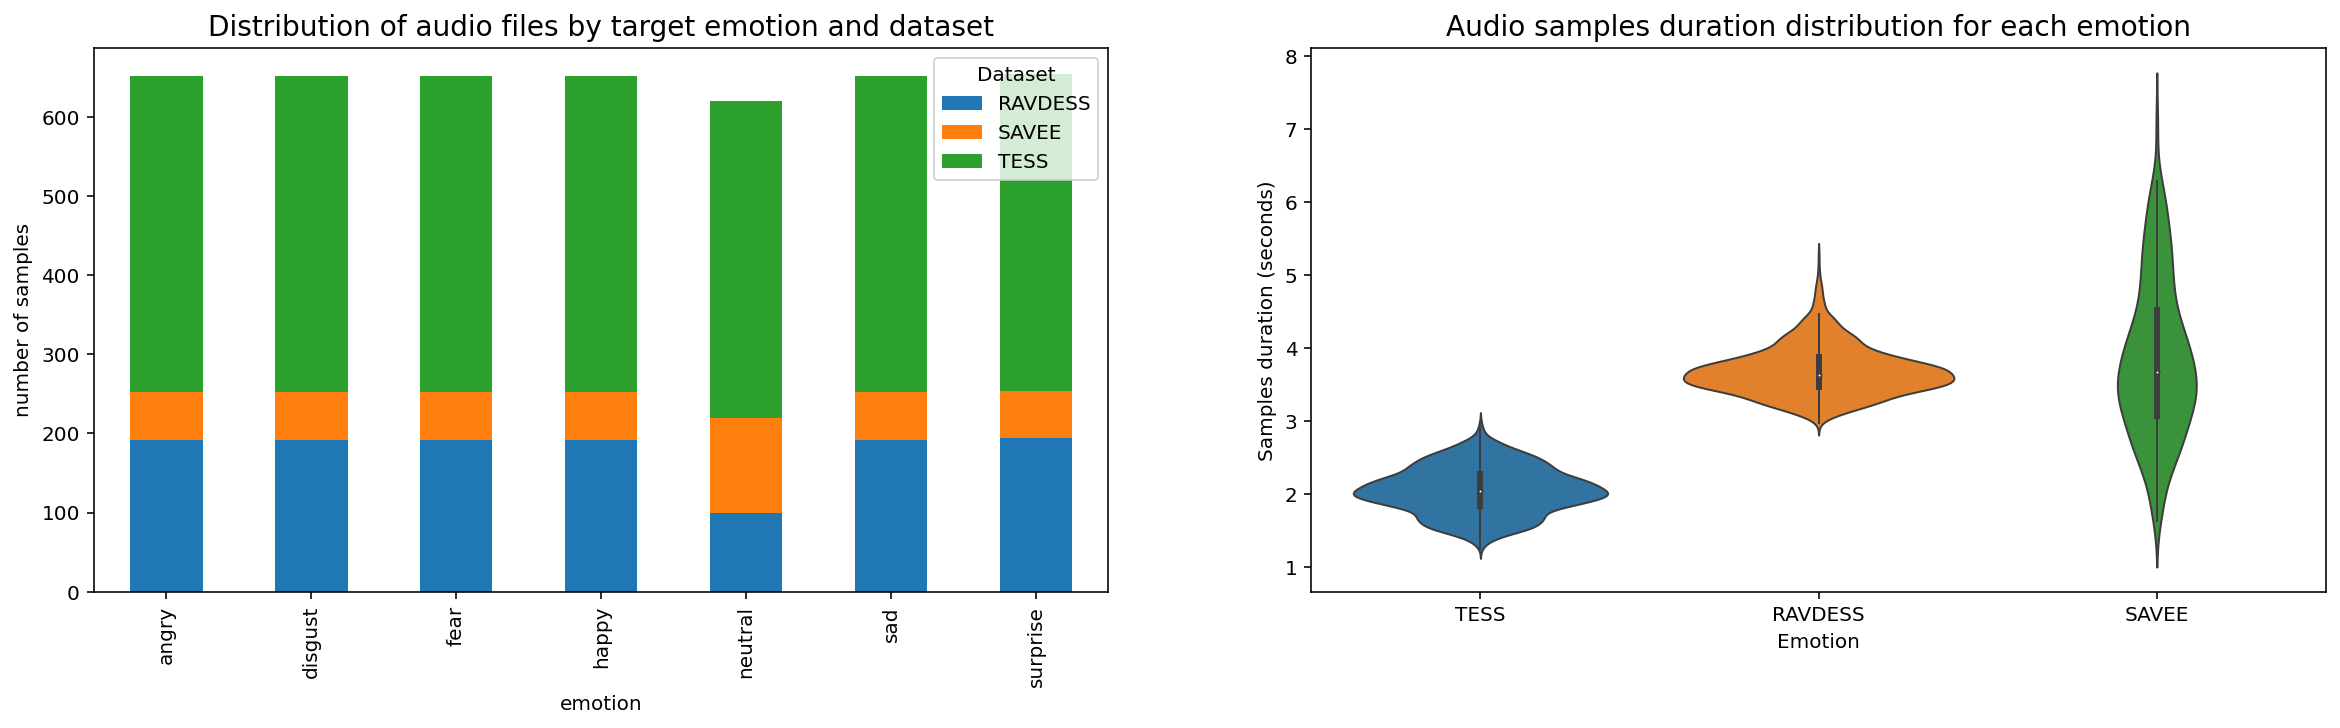

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))


df.groupby(['emotion','dataset']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of audio files by target emotion and dataset', size=14)
axes[0].set_ylabel('number of samples')
axes[0].legend(title='Dataset')


sns.violinplot(x=df['dataset'],y=df['duration'], linewidth=1, ax=axes[1])
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Samples duration (seconds)')
axes[1].set_title('Audio samples duration distribution for each emotion', size=14)

plt.show()

In [ ]:
def show_audio(emotion):
    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    # filter dataframe to emotion)
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0])
    
    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)
    
    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')
    
    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)
    
    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))
    
    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)
    
    # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])
    
    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')
    
    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')
    
    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()
    
    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

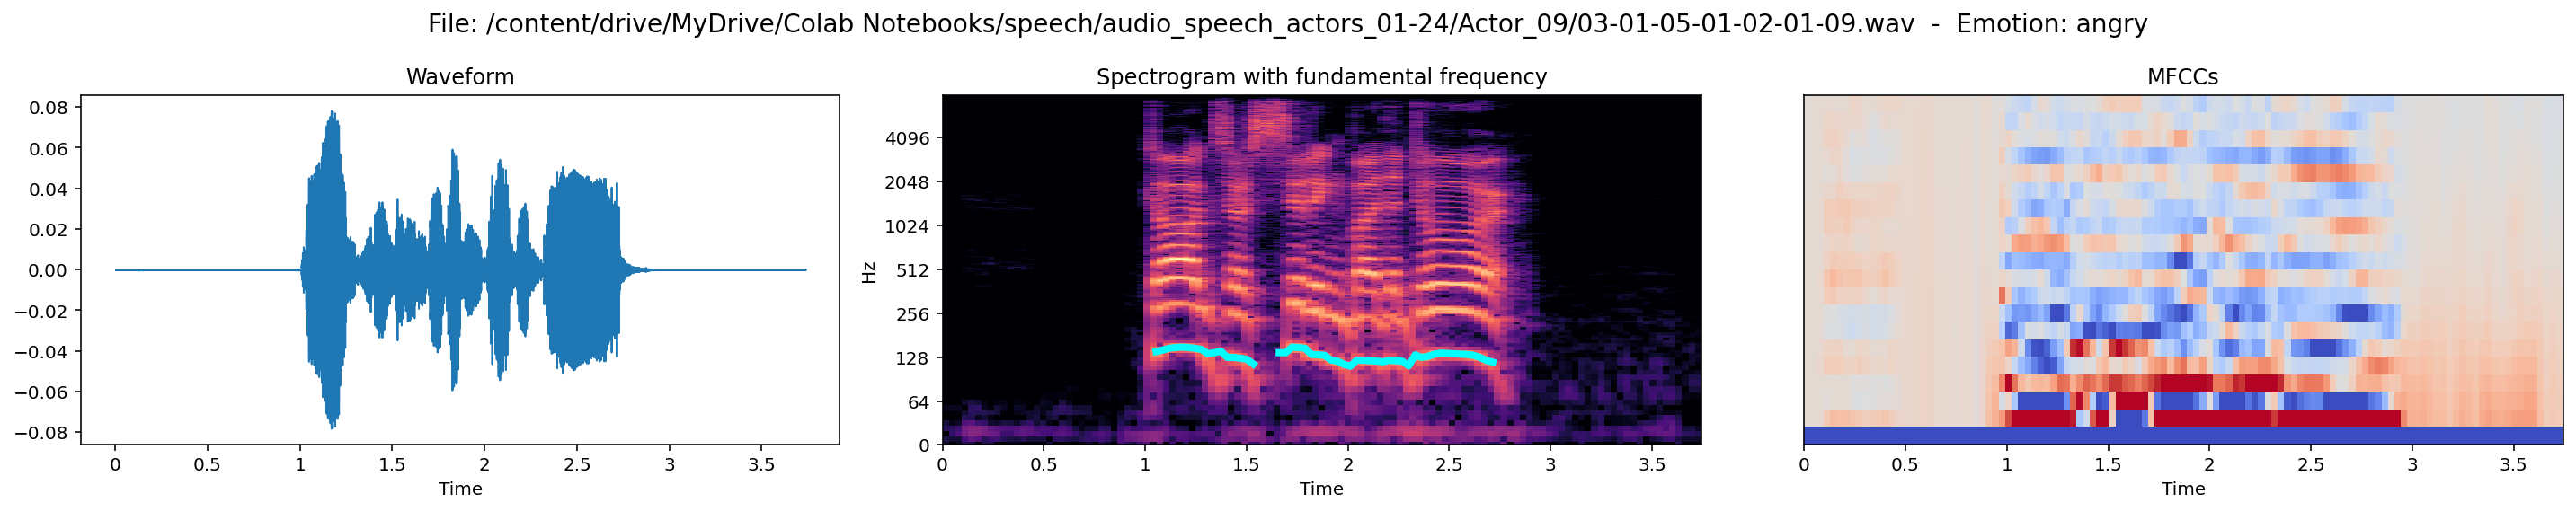

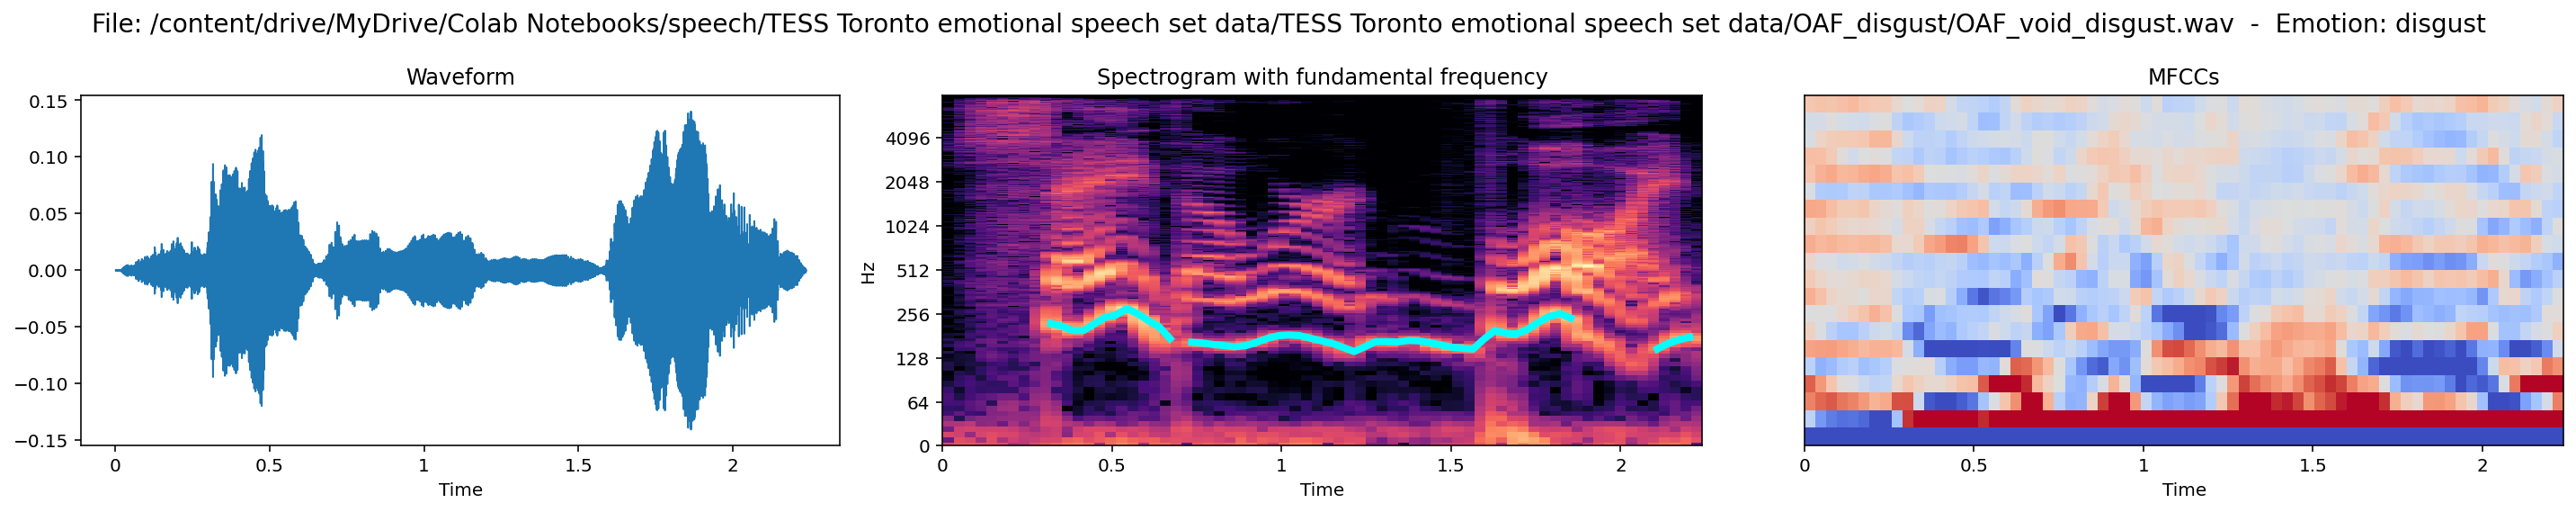

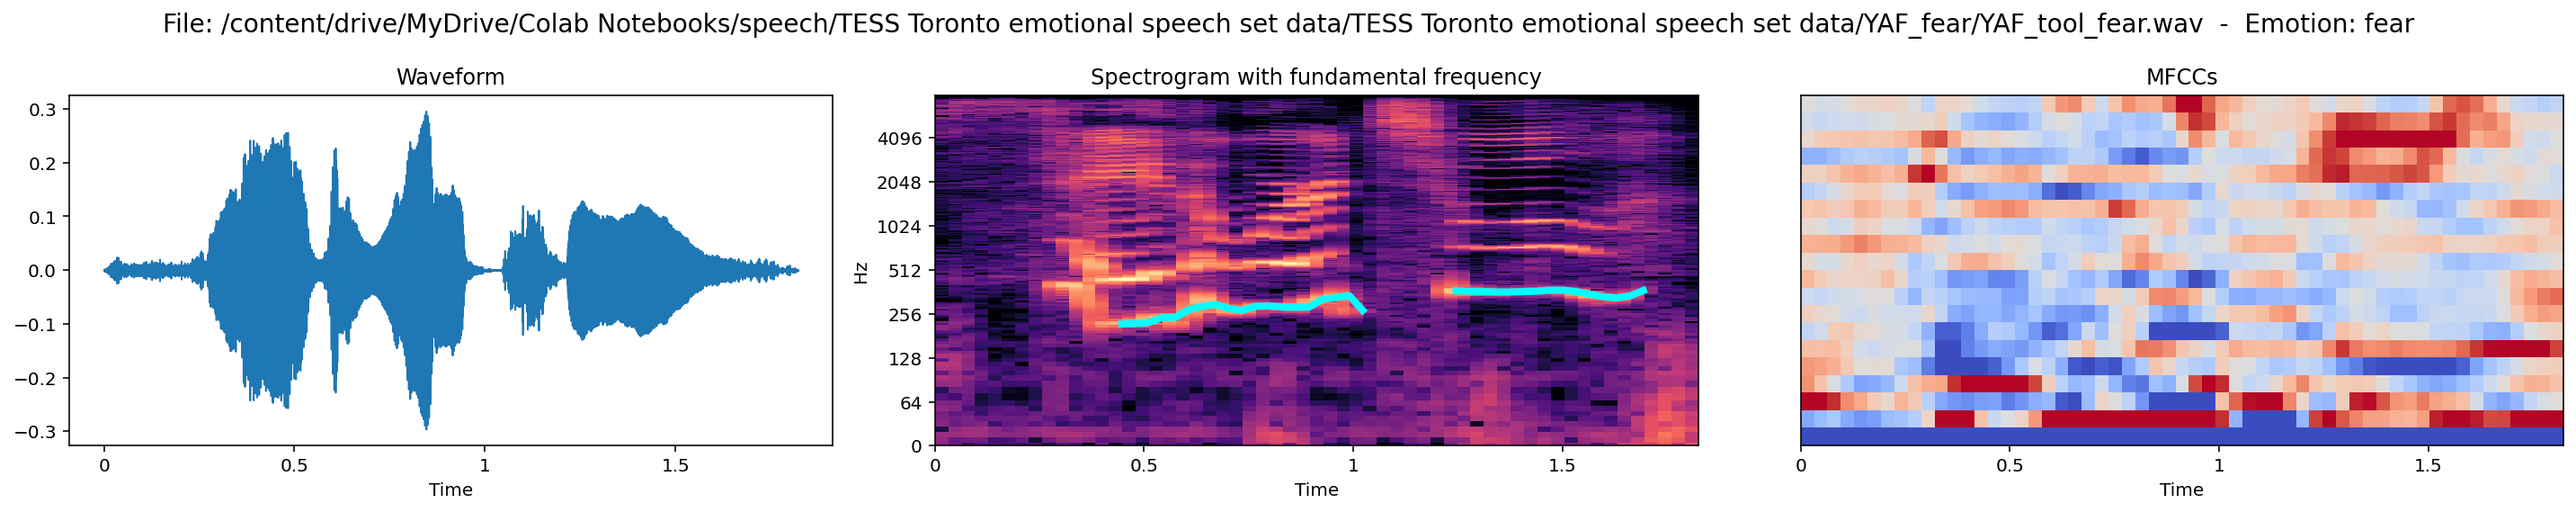

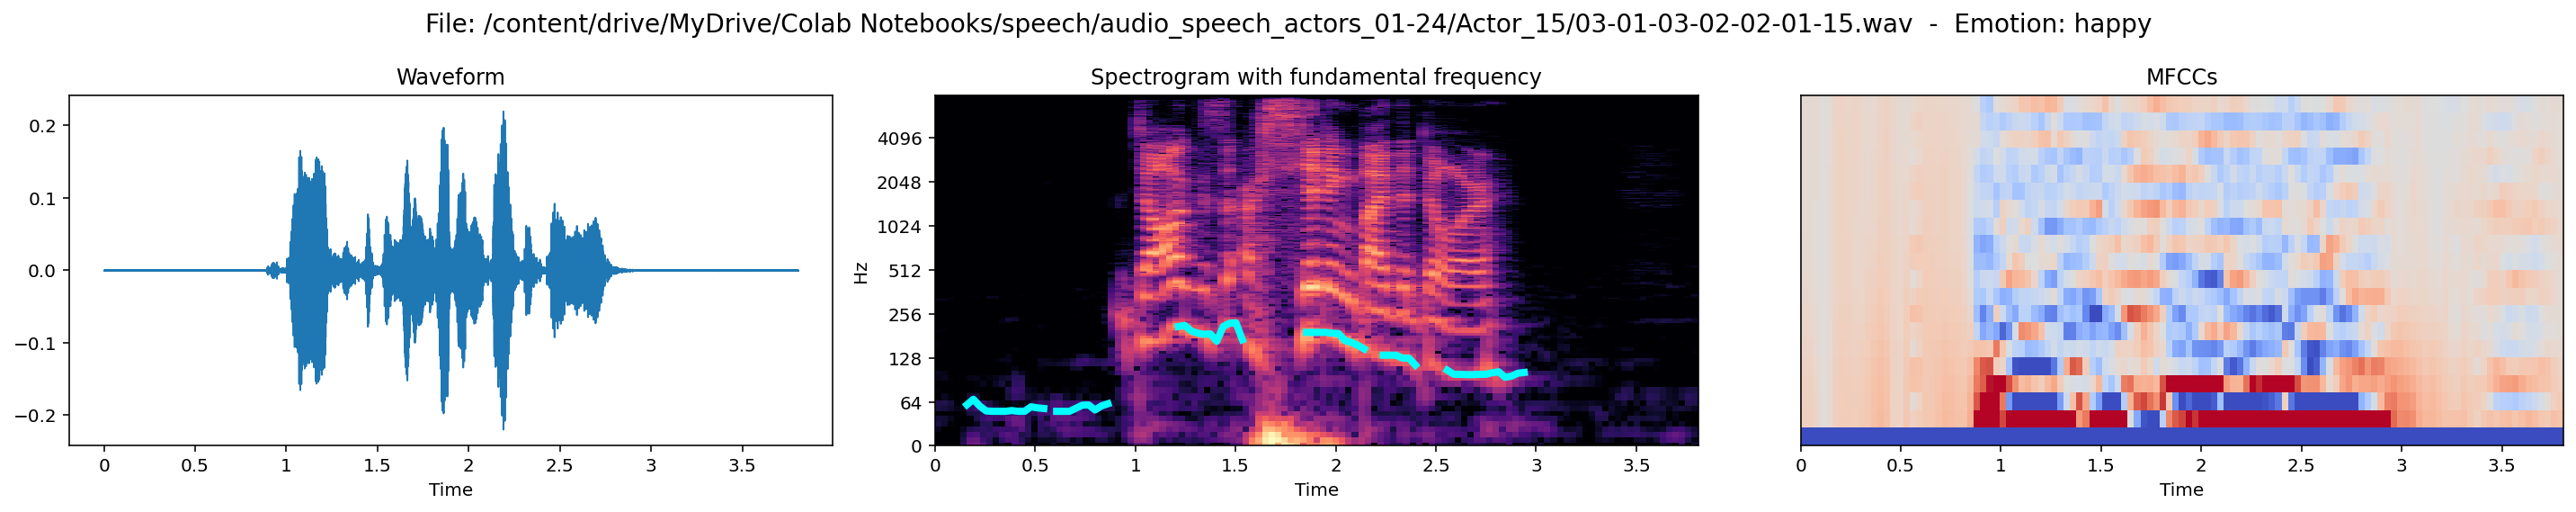

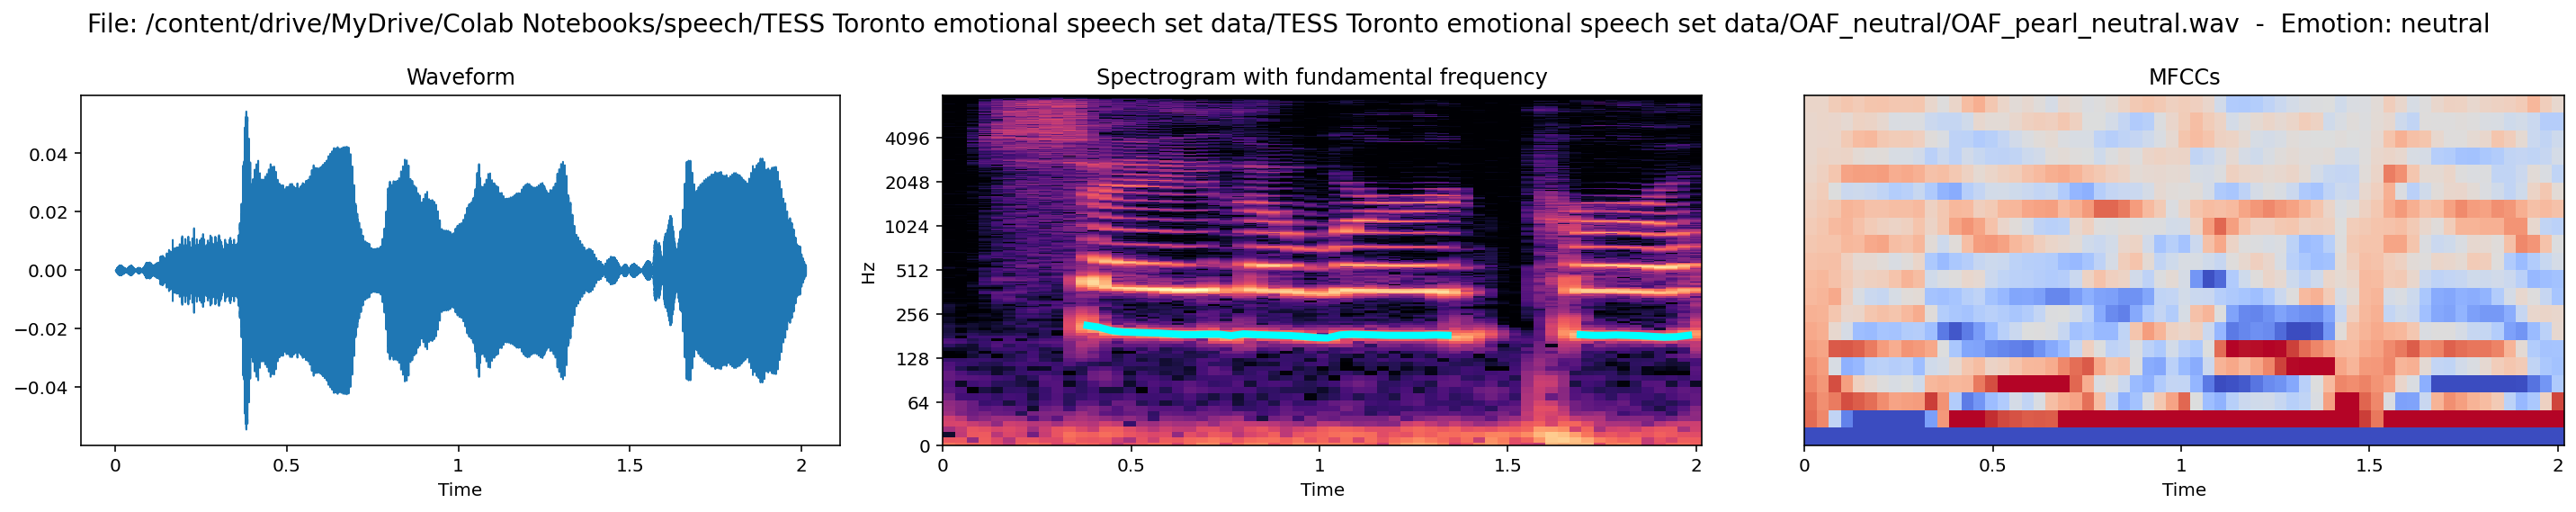

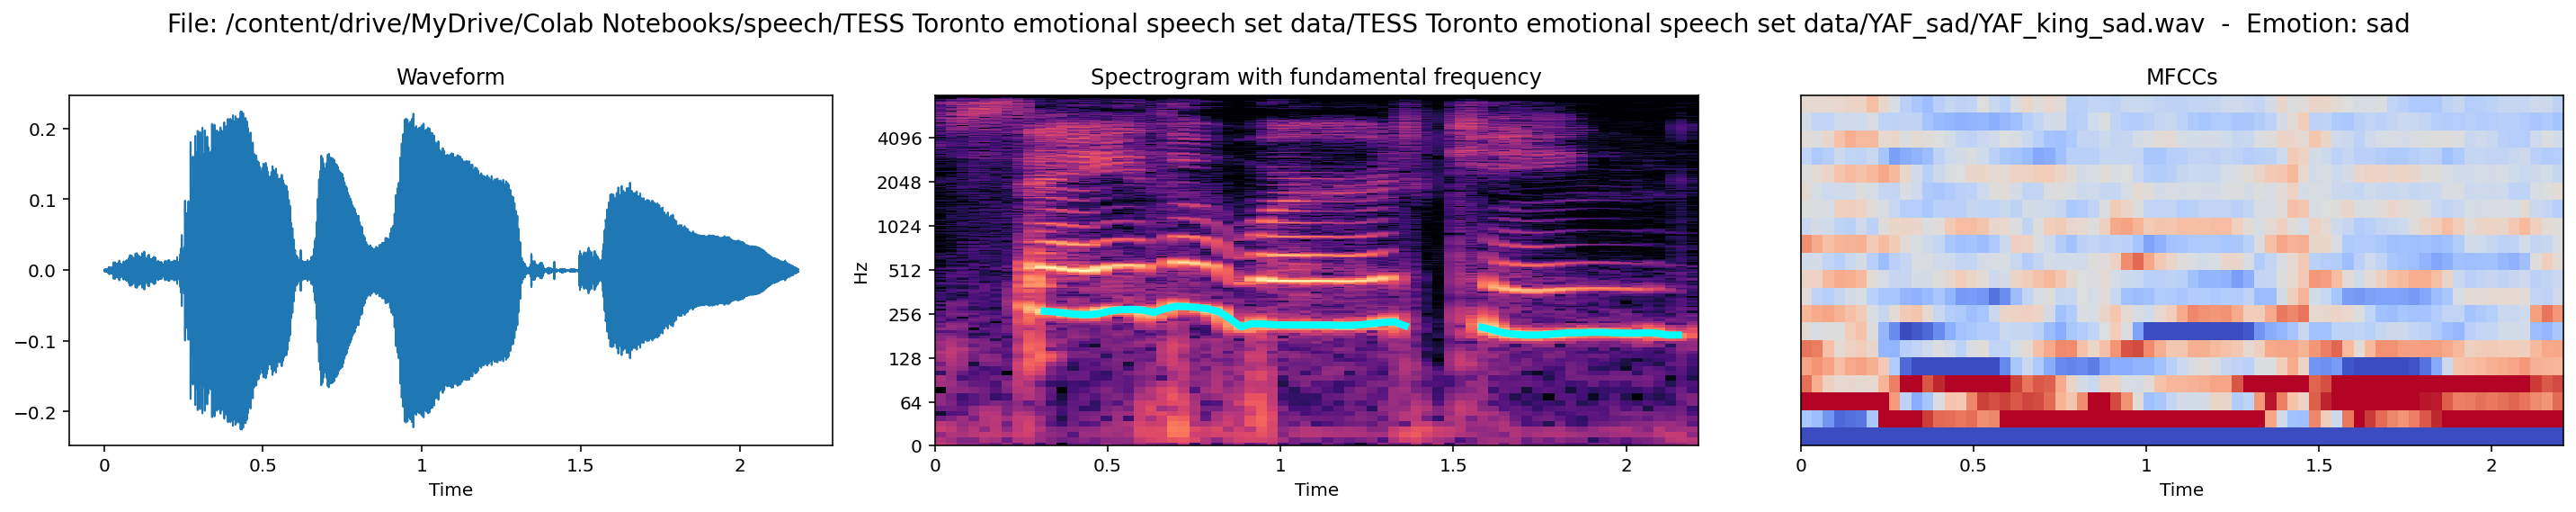

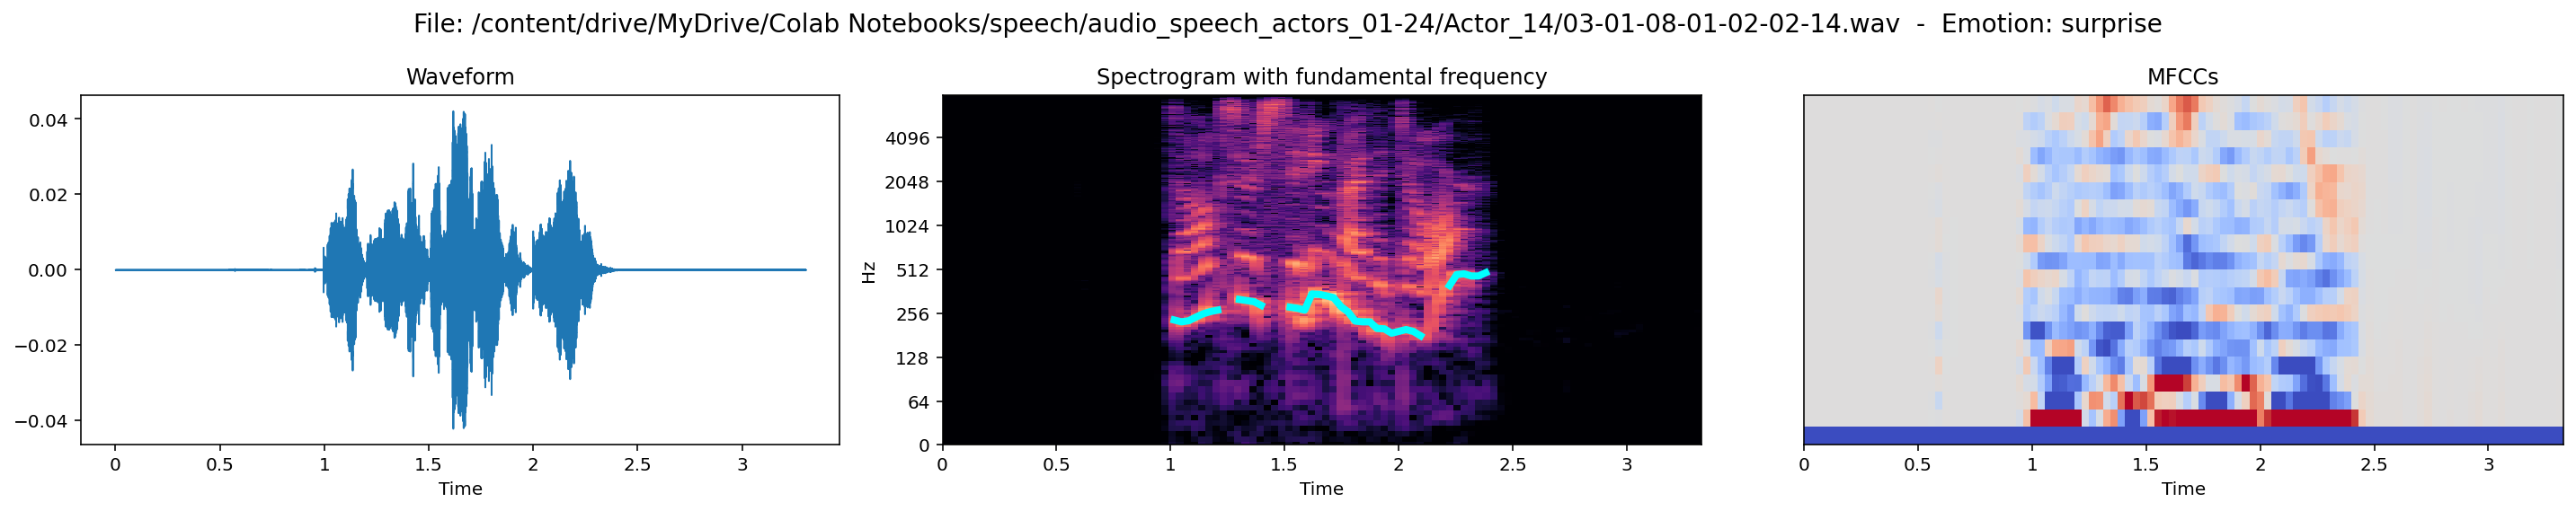

In [ ]:
emotions = sorted(list(df.emotion.unique()))

for emotion in emotions:
    show_audio(emotion)

In [ ]:
%%time

# Create a variable where to store the mfccs data
mfccs = []

for file in df.path:
    # load audio file:
    y, sr = librosa.load(file, sr=16000)
    
    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    mfccs.append(librosa.feature.mfcc(y, sr=sr, fmin=50, n_mfcc=30))

CPU times: user 10min 21s, sys: 5min 52s, total: 16min 13s
Wall time: 11min 18s


In [ ]:
def resize_array(array):
    new_matrix = np.zeros((30,150))
    for i in range(30):
        for j in range(150):
            try:
                new_matrix[i][j] = array[i][j]
            except IndexError:
                pass
    return new_matrix

resized_mfccs = []

for mfcc in mfccs:
    resized_mfccs.append(resize_array(mfcc))

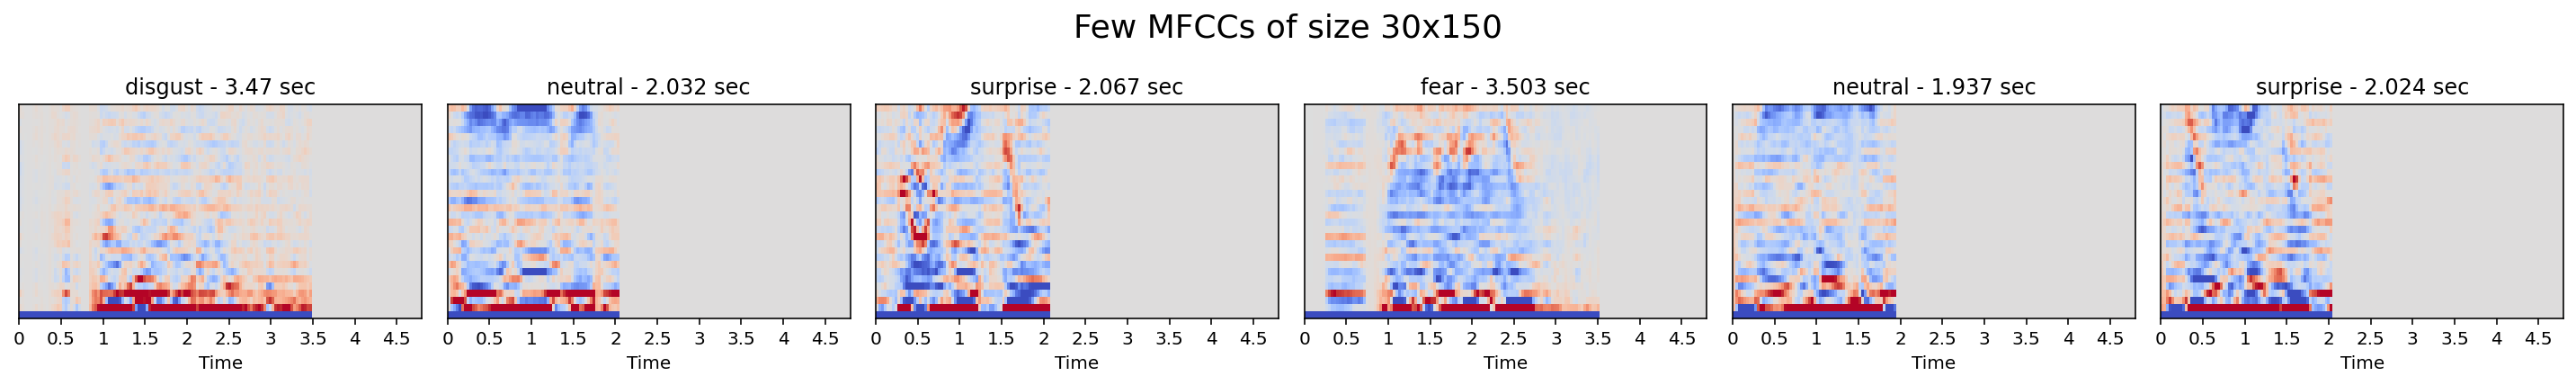

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=6, figsize=(20,3))

for i in range(6):
    index = random.randint(0, len(resized_mfccs))
    
    librosa.display.specshow(resized_mfccs[index], sr=sr, x_axis="time", ax=axs[i], norm=Normalize(vmin=-50, vmax=50))
    axs[i].set_title(str(df.emotion[index]) + ' - ' + str(df.duration[index]) + ' sec')

plt.suptitle('Few MFCCs of size 30x150', size=18)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}, inplace=True)
y = df.emotion.values

X = resized_mfccs.copy()

x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)
x_tr, x_va, y_tr, y_va = train_test_split(x_tr, y_tr, test_size=0.3, shuffle=True, random_state=0)

x_tr = np.array([i for i in x_tr])
x_va = np.array([i for i in x_va])
x_te = np.array([i for i in x_te])

print(x_tr.shape)
print(x_va.shape)
print(x_te.shape)

(2856, 30, 150)
(1224, 30, 150)
(454, 30, 150)


In [ ]:
tr_mean = np.mean(x_tr, axis=0)
tr_std = np.std(x_tr, axis=0)

x_tr = (x_tr - tr_mean)/tr_std
x_va = (x_va - tr_mean)/tr_std
x_te = (x_te - tr_mean)/tr_std

In [ ]:
print(f"x_tr has a dimension of {x_tr.shape} before the manipulation.")

x_tr = x_tr[..., None]
x_va = x_va[..., None]
x_te = x_te[..., None]

print(f"x_tr has a dimension of {x_tr.shape} after the manipulation.")

x_tr has a dimension of (2856, 30, 150) before the manipulation.
x_tr has a dimension of (2856, 30, 150, 1) after the manipulation.


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D)
from tensorflow.keras import initializers


model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation="relu", input_shape=x_tr.shape[1:]))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=4, strides=(2, 1), activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 73, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 36, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 6, 36, 64)        256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 33, 32)         32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 16, 32)        0         
 2D)                                                             
                                                        

In [ ]:
def model_1():
  inputs = Conv2D()
def model1():
    inputs = keras.layers.Input(shape=(224, 224, 3))   
    x = keras.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    
    x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)      
    
    model1 = keras.Model(inputs, outputs, name= "model1")
    
    return model1

In [ ]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

earlystopping_cb = keras.callbacks.EarlyStopping(patience=5)

In [ ]:
# import tensorflow as tf
# x_tr = tf.convert_to_tensor(x_tr, dtype=tf.float64)
# x_te = tf.convert_to_tensor(x_te, dtype=tf.float64)
# x_va = tf.convert_to_tensor(x_va, dtype=tf.float64)

In [ ]:
# y_tr = y_tr.astype(np.int32)
# y_tr = tf.convert_to_tensor(y_tr, dtype = tf.int32)

In [ ]:
# y_tr = tf.convert_to_tensor(y_tr, dtype = tf.int32)
# y_te = tf.convert_to_tensor(y_te)
# y_va = tf.convert_to_tensor(y_va)

In [ ]:
%%time


history = model.fit(
    x=x_tr,
    y=y_tr,
    epochs=100,
    batch_size=32,
    validation_data=(x_va, y_va),
    callbacks=[earlystopping_cb]
)

Epoch 1/100
90/90 [==============================] - 8s 88ms/step - loss: 0.3909 - accuracy: 0.8673 - val_loss: 0.6146 - val_accuracy: 0.7672
Epoch 2/100
90/90 [==============================] - 6s 70ms/step - loss: 0.4287 - accuracy: 0.8627 - val_loss: 0.5340 - val_accuracy: 0.7982
Epoch 3/100
90/90 [==============================] - 10s 109ms/step - loss: 0.3739 - accuracy: 0.8659 - val_loss: 0.5620 - val_accuracy: 0.7949
Epoch 4/100
90/90 [==============================] - 6s 71ms/step - loss: 0.3453 - accuracy: 0.8715 - val_loss: 0.5368 - val_accuracy: 0.8162
Epoch 5/100
90/90 [==============================] - 7s 83ms/step - loss: 0.3306 - accuracy: 0.8750 - val_loss: 0.5342 - val_accuracy: 0.8137
Epoch 6/100
90/90 [==============================] - 7s 74ms/step - loss: 0.3590 - accuracy: 0.8732 - val_loss: 0.5578 - val_accuracy: 0.7974
Epoch 7/100
90/90 [==============================] - 8s 84ms/step - loss: 0.3218 - accuracy: 0.8789 - val_loss: 0.5326 - val_accuracy: 0.8096
Epoc

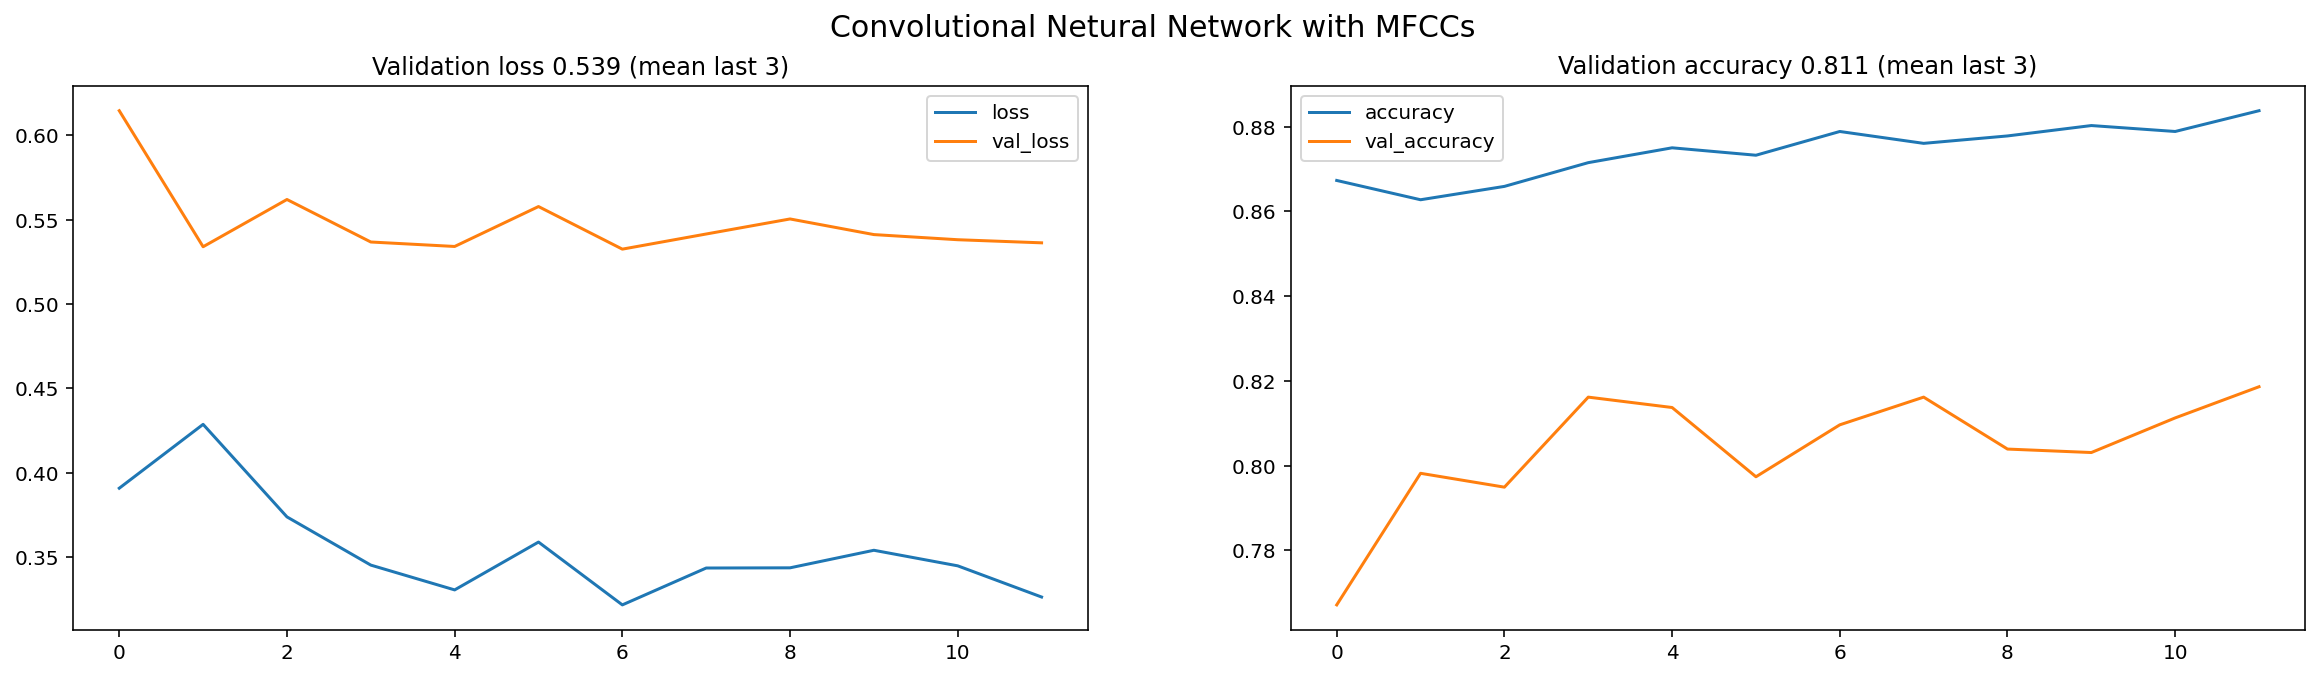

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Convolutional Netural Network with MFCCs', size=15)
results = pd.DataFrame(history.history)
results[["loss", "val_loss"]].plot(ax=axs[0])
axs[0].set_title("Validation loss {:.3f} (mean last 3)".format(np.mean(history.history["val_loss"][-3:])))
results[["accuracy", "val_accuracy"]].plot(ax=axs[1])
axs[1].set_title("Validation accuracy {:.3f} (mean last 3)".format(np.mean(history.history["val_accuracy"][-3:])))
plt.show()

In [ ]:
loss_te, accuracy_te = model.evaluate(x_te, y_te)

print("Test loss: {:.2f}".format(loss_te))
print("Test accuracy: {:.2f}%".format(100 * accuracy_te))

15/15 [==============================] - 0s 13ms/step - loss: 0.4688 - accuracy: 0.8326
Test loss: 0.47
Test accuracy: 83.26%


15/15 [==============================] - 1s 22ms/step


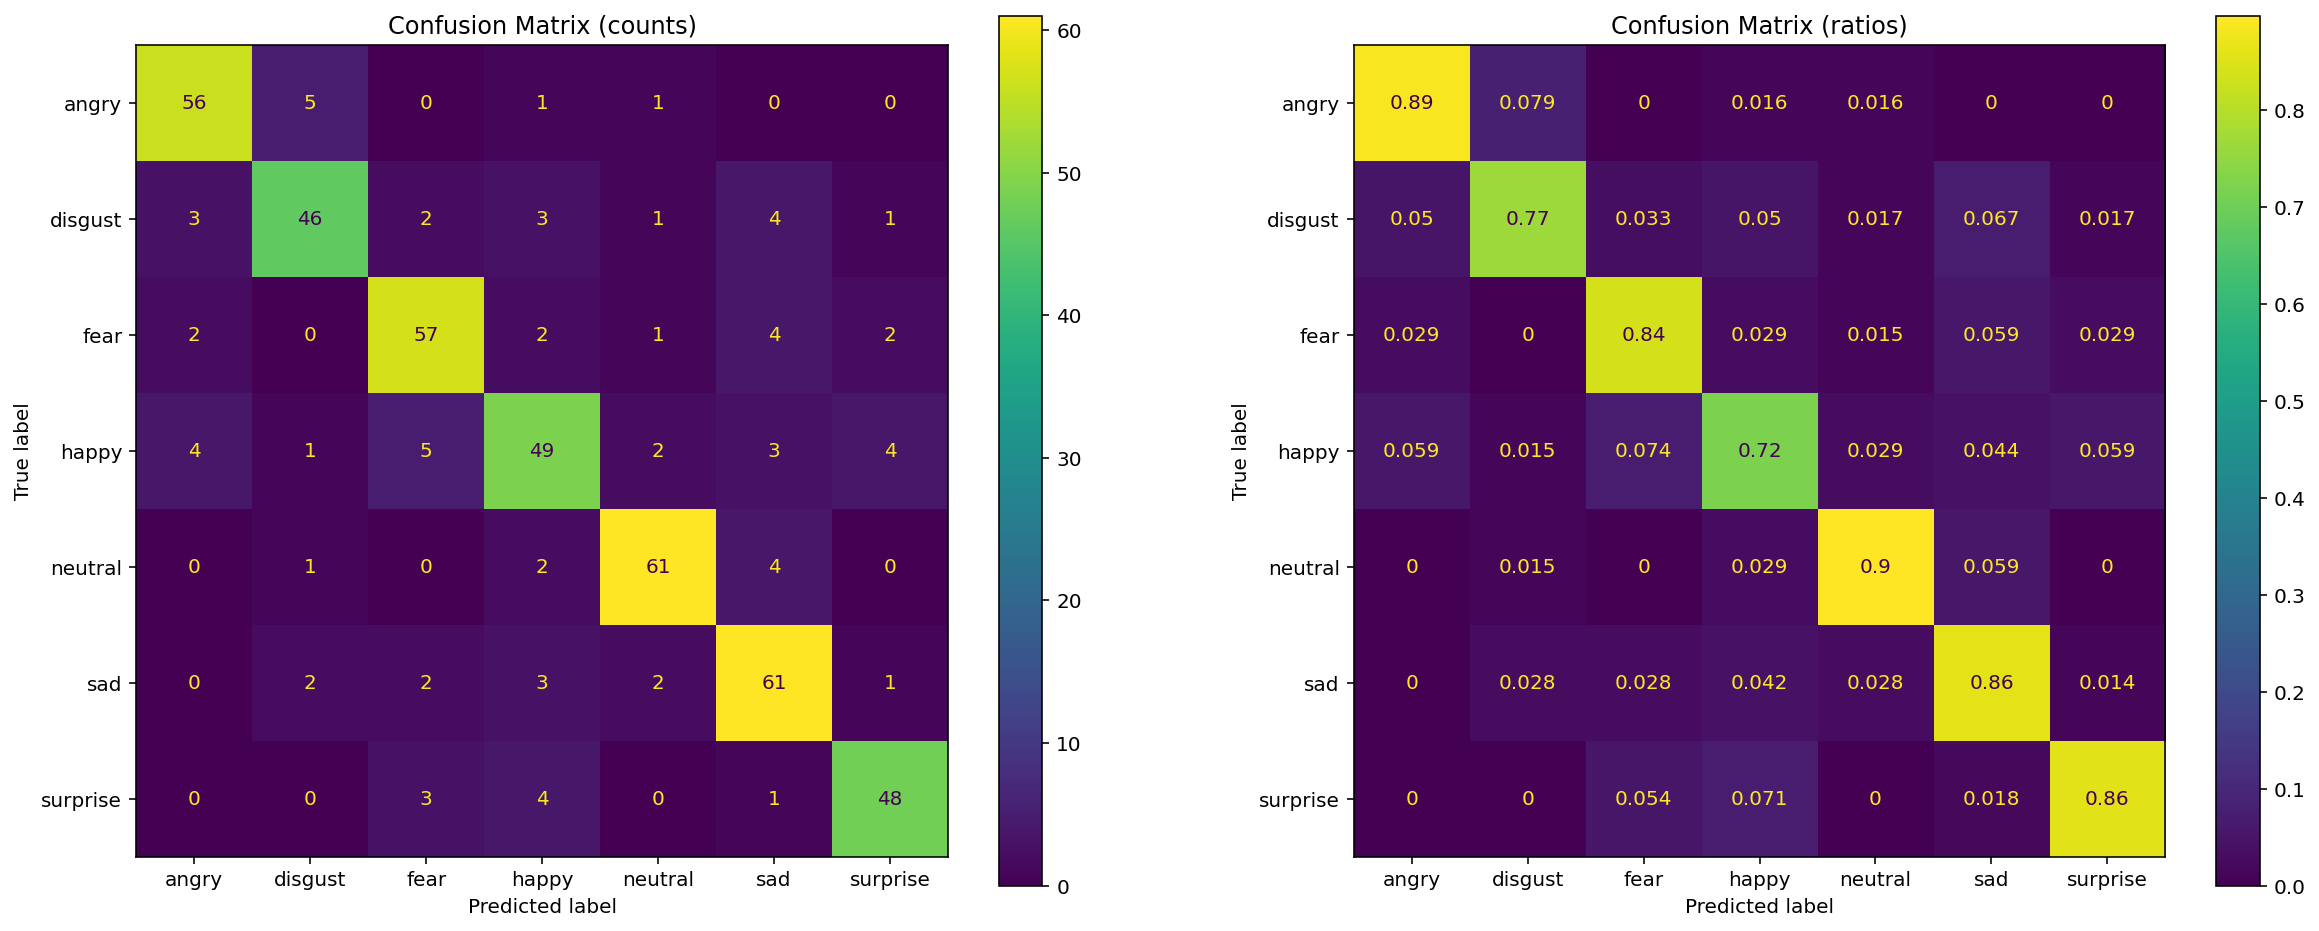

In [ ]:
predictions = model.predict(x_te)

pred = []

for i in predictions:
    pred.append(np.argmax(i))
    
from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def plot_confusion_matrices(y_true, y_pred):

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="true", ax=ax2)

    plt.show()

plot_confusion_matrices(y_te, pred)

In [ ]:
path_model_save = "./model84.h5"

model.save(path_model_save)